<b>¡Hola Constanza!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!



# **PROYECTO FINAL: TELECOMUNICACIONES, identificar operadores ineficaces**

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

## **Descripción de los datos**

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

**Tu proyecto constará de tres componentes:**

- Un notebook con tu código (.ipynb)
- Una presentación (.pdf)
- Un link a tu dashboard en Tableau Public (dashboard.txt) (opcional)

Asegúrate de que la solución esté completa y comprueba que el código funciona en Jupyter antes de enviarlo para su revisión. No te sorprendas si te piden que hagas algunas mejoras.

Carga el archivo en Google Drive y copia el enlace para compartir al principio de tu notebook.

Si quieres crear un dashboard más tarde, informa al líder de tu equipo cuando entregues tu proyecto por primera vez. El proyecto será aceptado solo después de que envíes tu dashboard.

**Dashboards**
1. Sugerencia 1
    1. Traza un histograma para la duración de la llamada
    2. Traza un gráfico circular que muestre la participación de las llamadas internas y externas
    3. Agrega un filtro para la "dirección" de llamadas
2. Sugerencia 2
    1. Traza un histograma que muestre el número de llamadas por día
    2. Traza un gráfico circular que muestre la participación de las llamadas internas y externas
    3. Agrega un filtro por tipo de llamada (interna o externa)

Haz una lista de 5 a 10 fuentes (documentación, artículos, etc) que usaste mientras trabajabas en el proyecto. Brinda explicaciones breves sobre las preguntas que cada fuente te ayudó a responder. Prepara una presentación con tus conclusiones. Puedes usar cualquier herramienta que quieras para hacer la presentación, pero debes enviarla en PDF. Coloca el enlace en el cuerpo del proyecto principal.

## **1. Objetivo del proyecto**

Identificar los operadores menos eficaces del servicio de telefonía virtual CallMeMaybe para mejorar el rendimiento operativo de los operadores. CallMeMaybe, considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas), un tiempo de espera prolongado para las llamadas entrantes y una cantidad baja de llamadas salientes.

## **2. Composición de las tareas**

## **Paso 1. Preprocesamiento de los datos**

### **1.1. Cargar los data sets: telecom_dataset_us.csv y telecom_clients_us.csv**

In [1]:
# Importar liberías

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar los datos

dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')
clients = pd.read_csv('/datasets/telecom_clients_us.csv')

### **1.2. Obtener información general de los catos con los métodos info(), head(), describe()**

#### 1.2.1. Conocer información del DataFrame 'telecom'

In [3]:
# Información general del DataFrame 'dataset' aplicando info() y head()

dataset.info()
print()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has utilizado el método <code>info()</code> de manera efectiva para obtener una visión general de los tipos de datos y valores nulos en el DataFrame 'dataset'. Esto es crucial para identificar problemas potenciales en los datos desde el principio, como valores faltantes o tipos de datos incorrectos que podrían afectar el análisis posterior.
</div>


In [4]:
# Información de las esadísticas del DataFrame 'dataset'

dataset.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
El uso de <code>describe()</code> proporciona un buen resumen estadístico de las columnas numéricas en el DataFrame 'dataset'. Observa que algunas columnas, como <code>call_duration</code> y <code>total_call_duration</code>, tienen valores extremos, lo que puede influir en el promedio y otras métricas. Considera la posibilidad de visualizarlos mediante gráficos para entender mejor su distribución y evaluar su impacto en el análisis.
</div>


Analizando lo datos del DataFrame 'dataset' se encuentra lo siguiente:

1. Es un DataFrame con 9 columnas y en 7 de ellas se presentan 53,902 filas sin valores ausentes. La columna 'internal' presenta 53,785 valores non-null, esto quiere decir que tiene 117 valores ausentes. Por otra parte, la columna 'operator_id' presenta 45,730 valores non-null, indicando que esta columna presenta alrededor de 8,000 valores ausentes.

2. La columna 'date', contiene información de la fecha en la que se recuperaron las estadísticas, los tipos de datos eran 'object', por lo tanto es necesario realizar cambio al tipo de datos a datetime.

4. Las demás columnas tiene tipo de datos correctos de acuerdo a la información contenida en las columas de 'dataset'.

5. En la columna 'calls_count' se tiene una media de 16.45, mediana de 4 y desviación estándar de 62.92. Estos valores indican que hay una gran cantidad de valores atípicos. Es muy posible que una parte importante de los operadores reciben pocas llamadas y otros de ellos reciben un número muy alto de ellas. Esta gran variacón se puede confirmar con los valores mínimos 1 y máximos 4817 para esta columna de número de llamadas.

6. La columna 'call_duration' también presenta una media y mediana muy diferentes, mientras que la media es 866.68, la mediana 38, la desviación estándar 3731.79. En cuanto al valor mínimo es 0 el máximo 144,395, o es poyque hubo muchas llamadas perdidas o fueron muy cortas por no reportan tiempo de duración. Todo lo anterior indica que la distribución de los datos está sesgada a la derecha, además de que hay muchas llamadas cortas pero hay otras que son realmente muy largas.

7. La columna 'total_call_duration' presenta un comportamiento muy similar a 'call_count' y 'call_duration'. La diferencia entre la media 1157,13 y la mediana 210 es muy grande, la desviación estándar 4403.47 lo confirma. Además el mínimo 0 y el máximo 166,155 demuestra el mismo comportamiento especialmente con 'call_duration'.

8. Comparando los valores de la media de 'call_duration' 866.68 y 'total_call-duration' 1157.13 en donde esta última incluye el tiempo de espera, se demuestra que el tiempo de espera promedio en las llamadas es de 290.45 (seg), es decir casi 5 minutos, que se puede considerar un tiempo de espera largo.

#### 1.2.2. Conocer información del DataFrame 'clients'

In [5]:
# Información general del DataFrame 'clients' aplicando info() y head()

clients.info()
print()
clients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB



,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


El DataFrame 'clients' está compuesto por tres columnas la identificación del usuario, la taria de la clientela y su fecha de registro. Cada fila cuenta con 732 valores non-null l que indica que no hay valores ausentes.

La columna 'date_start' al tratarse de una fecha debe cambiarse el tipo de datos de object al tipo de datos apropiado para el análisis a datetime.

A esta tabla no es necesario realizarle las estadísticas ya que no cuenta con columnas numéricas para este análisis.

### **1.3. Convertir tipos de datos**

In [6]:
# Convertir tipo de datos de la columna 'date' del DaFrame 'dataset'

dataset['date'] = pd.to_datetime(dataset['date'])

dataset['date'] = dataset['date'].dt.tz_convert('UTC')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   user_id              53902 non-null  int64              
 1   date                 53902 non-null  datetime64[ns, UTC]
 2   direction            53902 non-null  object             
 3   internal             53785 non-null  object             
 4   operator_id          45730 non-null  float64            
 5   is_missed_call       53902 non-null  bool               
 6   calls_count          53902 non-null  int64              
 7   call_duration        53902 non-null  int64              
 8   total_call_duration  53902 non-null  int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Has convertido correctamente la columna <code>date</code> a un formato de fecha y hora con zona horaria UTC. Esto es esencial para cualquier análisis temporal que realices más adelante, ya que garantiza que las operaciones de tiempo sean precisas y consistentes.
</div>


In [7]:
# Convertir tipo de datos de la columna 'date_start' del DaFrame 'clients'

clients['date_start'] = pd.to_datetime(clients['date_start'])

clients['date_start'] = clients['date_start'].dt.tz_localize('UTC')

clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   user_id      732 non-null    int64              
 1   tariff_plan  732 non-null    object             
 2   date_start   732 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 17.3+ KB


Se realizó el cambio del tipo de datos de las columnas que contenían fechas 'date' y 'date_star' presentes en los DataFame 'dataset' y 'clientes' respectivamente. Dichas columnas presentaban tipos de datos object y fueron cambiados al tipo de datos datetime. Además, para que ambas fechas fueran compatibles en este análisis se convirtió la columna 'date' con zona horaria + 03:00 a UTC, de igual forma para la coumna 'date_start' se convirtió a UTC.

### **1.4 Unir los DataFrame**

In [8]:
# Unir los DataFrame 'dataset' y 'clients' en un solo

telecom = pd.merge(dataset, clients, on='user_id', how='left')

telecom.info()
print()
telecom.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53902 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   user_id              53902 non-null  int64              
 1   date                 53902 non-null  datetime64[ns, UTC]
 2   direction            53902 non-null  object             
 3   internal             53785 non-null  object             
 4   operator_id          45730 non-null  float64            
 5   is_missed_call       53902 non-null  bool               
 6   calls_count          53902 non-null  int64              
 7   call_duration        53902 non-null  int64              
 8   total_call_duration  53902 non-null  int64              
 9   tariff_plan          53902 non-null  object             
 10  date_start           53902 non-null  datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](2), float64(1), int64(4), object(3)
memory usage

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-03 21:00:00+00:00,in,False,NaN,True,2,0,4,B,2019-08-01 00:00:00+00:00
1,166377,2019-08-04 21:00:00+00:00,out,True,880022.0,True,3,0,5,B,2019-08-01 00:00:00+00:00
2,166377,2019-08-04 21:00:00+00:00,out,True,880020.0,True,1,0,1,B,2019-08-01 00:00:00+00:00
3,166377,2019-08-04 21:00:00+00:00,out,True,880020.0,False,1,10,18,B,2019-08-01 00:00:00+00:00
4,166377,2019-08-04 21:00:00+00:00,out,False,880022.0,True,3,0,25,B,2019-08-01 00:00:00+00:00


<div class="alert alert-block alert-warning">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Al unir los DataFrames 'dataset' y 'clients', es importante verificar si la operación de merge ha introducido filas duplicadas o valores nulos adicionales. Esto es crucial para mantener la integridad de los datos y asegurar que los análisis posteriores sean precisos. Revisa estos aspectos para prevenir problemas en etapas posteriores del análisis.
</div>


El DataFrame obtenido 'telecom' cuenta con la información de las dos tablas 'dataset' y 'clientes' unidas por la columna 'user_id'. Está conformada por 11 columnas con 53902 filas, la única columna que presenta valores ausentes es la columna 'operator_id'. Las dos columnas de fechas tiene los tipos de datos correctos y ambas está en UTC para que puedan ser compatiles en este análisis. Esta unión de DataFrae se realizó para facilitar el análisis de este proyecto desde este inicio.

### **1.5. Realizar limpieza de datos**

#### 1.5.1. Valores ausentes

In [9]:
# Gestionar los valores ausentes de la columna 'operator_id'

telecom.dropna(subset=['internal'], inplace=True)

telecom['operator_id'] = telecom['operator_id'].fillna('Unknown')

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53785 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   user_id              53785 non-null  int64              
 1   date                 53785 non-null  datetime64[ns, UTC]
 2   direction            53785 non-null  object             
 3   internal             53785 non-null  object             
 4   operator_id          53785 non-null  object             
 5   is_missed_call       53785 non-null  bool               
 6   calls_count          53785 non-null  int64              
 7   call_duration        53785 non-null  int64              
 8   total_call_duration  53785 non-null  int64              
 9   tariff_plan          53785 non-null  object             
 10  date_start           53785 non-null  datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](2), int64(4), object(4)
memory usage: 4.6+ MB


<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Has manejado adecuadamente los valores nulos en las columnas <code>internal</code> y <code>operator_id</code>. Al reemplazar los valores nulos de <code>operator_id</code> con 'Unknown', evitas la pérdida de datos valiosos, lo que es una buena práctica para mantener la integridad del conjunto de datos.
</div>


El DataFrame 'telecom' presentaba dos columnas con valores ausentes las cuales se procedió a gestinarlas de formas diferentes.

1. 'internal'. Esta columna inicialmente presentaba 53,785 valores nn-null, mientras que la mayoría de columnas presentaban 53,902 valores non-null, indicando que 'internal' solo tenía 117 valores ausentes, esto corresponde al 0.23% del total de los datos, por lo tanto se decidió a elimiar estos valores ausentes.

2. 'operator_id'. Esta columna presentaba 45,739 valores non-null, comparando con las otras columnas con 53,902 indicaba que a 'operator_id' tenía 8,172 valores ausentes, repsentando el 15.16% del total de los datos. El ser esta proporción un valor considerable dentro del total de datos en la tabla 'telecom', la forma más adecuada de gestión fue rellenando los valores ausentes con 'Unknown' evitando perder información importante si se hubieran eliminado.

3. Al final de esta gestión de valores ausentes, todas las clumnas del DataFrame 'telecom' quedadon cn la misma cantidad de valores non-null, 53,785.

#### 1.5.2. Valores duplicados

In [10]:
# Encontrar valores duplicados

telecom.duplicated().sum()

print('Número de filas duplicadas en la tabla "telecom":', telecom.duplicated().sum())

Número de filas duplicadas en la tabla "telecom": 4893


In [11]:
# Gestionar filas duplicadas

print('Número de filas duplicadas en la tabla "telecom":', telecom.drop_duplicates(inplace=True))
print()
telecom.info()

Número de filas duplicadas en la tabla "telecom": None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   user_id              48892 non-null  int64              
 1   date                 48892 non-null  datetime64[ns, UTC]
 2   direction            48892 non-null  object             
 3   internal             48892 non-null  object             
 4   operator_id          48892 non-null  object             
 5   is_missed_call       48892 non-null  bool               
 6   calls_count          48892 non-null  int64              
 7   call_duration        48892 non-null  int64              
 8   total_call_duration  48892 non-null  int64              
 9   tariff_plan          48892 non-null  object             
 10  date_start           48892 non-null  datetime64[ns, UTC]
dtypes: bool(1), datetime64[n

<div class="alert alert-block alert-warning">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
Has eliminado las filas duplicadas correctamente del DataFrame 'telecom'. Sin embargo, es importante reflexionar sobre por qué ocurrieron estas duplicaciones. Comprender su origen puede ayudarte a evitar problemas similares en el futuro y garantizar que el análisis no se vea afectado por datos redundantes.
</div>


Se econtraron 4893 filas duplicadas en todo el DataFrame de 'telecom'. La mejor forma de gestionar estos valores duplicados es elimando estas filas que reprepesntan el 9.09% del total de las 53,785 que habían. Realizando esta eliminación de duplicados la cantidad de filas ahora es de 48,892.

#### 1.5.3. Valores atípicos

In [12]:
# Encontrar valores atípicos en la columna 'calls_count'

# Encontrar el percentil 25 y 75 de los datos
calls_count_q1 = telecom['calls_count'].quantile(0.25)
calls_count_q3 = telecom['calls_count'].quantile(0.75)

# Calcular el valor intercuántico entre los cuartiles IQR
calls_count_IQR = calls_count_q3 - calls_count_q1

# Calcular los valores atípicos
calls_count_q1_lower = calls_count_q1 - 1.5 * calls_count_IQR
calls_count_q3_upper = calls_count_q3 + 1.5 * calls_count_IQR

# Calcular el total de los valores atrípicos para 'call_count'
calls_count_va = telecom[(telecom['calls_count'] < calls_count_q1_lower) | (telecom['calls_count'] > calls_count_q3_upper)]

print(f"Número de valores atípicos en 'calls_count': {len(calls_count_va)}")


Número de valores atípicos en 'calls_count': 6046


<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Has identificado valores atípicos en la columna <code>calls_count</code>. Considera visualizarlos para comprender mejor su distribución y su impacto en el análisis. Además, reflexiona sobre las posibles causas de estos valores extremos y cómo podrías manejarlos para mejorar la calidad del análisis.
</div>


In [13]:
# Encontrar valores atípicos en la columna 'call_duration'

# Encontrar el percentil 25 y 75 de los datos
call_duration_q1 = telecom['call_duration'].quantile(0.25)
call_duration_q3 = telecom['call_duration'].quantile(0.75)

# Calcular el valor intercuántico entre los cuartiles IQR
call_duration_IQR = call_duration_q3 - call_duration_q1

# Calcular los valores atípicos
call_duration_q1_lower = call_duration_q1 - 1.5 * call_duration_IQR
call_duration_q3_upper = call_duration_q3 + 1.5 * call_duration_IQR

# Calcular el total de los valores atrípicos para 'call_duration'
call_duration_va = telecom[(telecom['call_duration'] < call_duration_q1_lower) | (telecom['call_duration'] > call_duration_q3_upper)]

print(f"Número de valores atípicos en 'call_duration': {len(call_duration_va)}")


Número de valores atípicos en 'call_duration': 6846


In [14]:
# Encontrar valores atípicos en la columna 'total_call_duration'

# Encontrar el percentil 25 y 75 de los datos
total_call_duration_q1 = telecom['total_call_duration'].quantile(0.25)
total_call_duration_q3 = telecom['total_call_duration'].quantile(0.75)

# Calcular el valor intercuántico entre los cuartiles IQR
total_call_duration_IQR = total_call_duration_q3 - total_call_duration_q1

# Calcular los valores atípicos
total_call_duration_q1_lower = total_call_duration_q1 - 1.5 * total_call_duration_IQR
total_call_duration_q3_upper = total_call_duration_q3 + 1.5 * total_call_duration_IQR

# Calcular el total de los valores atrípicos para 'total_call_duration'
total_call_duration_va = telecom[(telecom['total_call_duration'] < total_call_duration_q1_lower) | (telecom['total_call_duration'] > total_call_duration_q3_upper)]

print(f"Número de valores atípicos en 'total_call_duration': {len(total_call_duration_va)}")


Número de valores atípicos en 'total_call_duration': 5926


Se realizó el cálculo de los valores atípicos en las columnas de cantidad de llamadas, duración de las llamadas y el total de la duración de las llamadas en donde se incluye el tiempo de espera. Los valores atípicos encontrados fueron para: 'calls_count' 6046, 'call_duration' 6846 y 'total_call_duration' 5926. La alta cantidad de valores atípicos confirman los datos obtenidos en las estadísticas del método describe( ) para estas mismas columnas, en donde se evidenciaba por los valores de la media, mediana, desviación estándar, mínimos y máximos que el DataFrame tiene una alta cantidad de valores atípicos. 

Esto puede deberse a que la mayoría de las llamadas son llamadas perdidas o con tiempos de duración muy cortos, pero también está el otro extremo en donde las llamadas son muy largas o un operador recibe una gran cantidad de llamadas. 

Eliminar los valores atípicos encontrados considero que no es la mejor manera para procesarlos porque se puede perder información importante que proporcione el rendimiento de ciertos operadores. Además, por los valores estadísticos de las columnas antes mencionadas y los valores atípicos encontrados parecer ser que son características importantes de la llamadas telefónicas reportadas en este DataFrame.

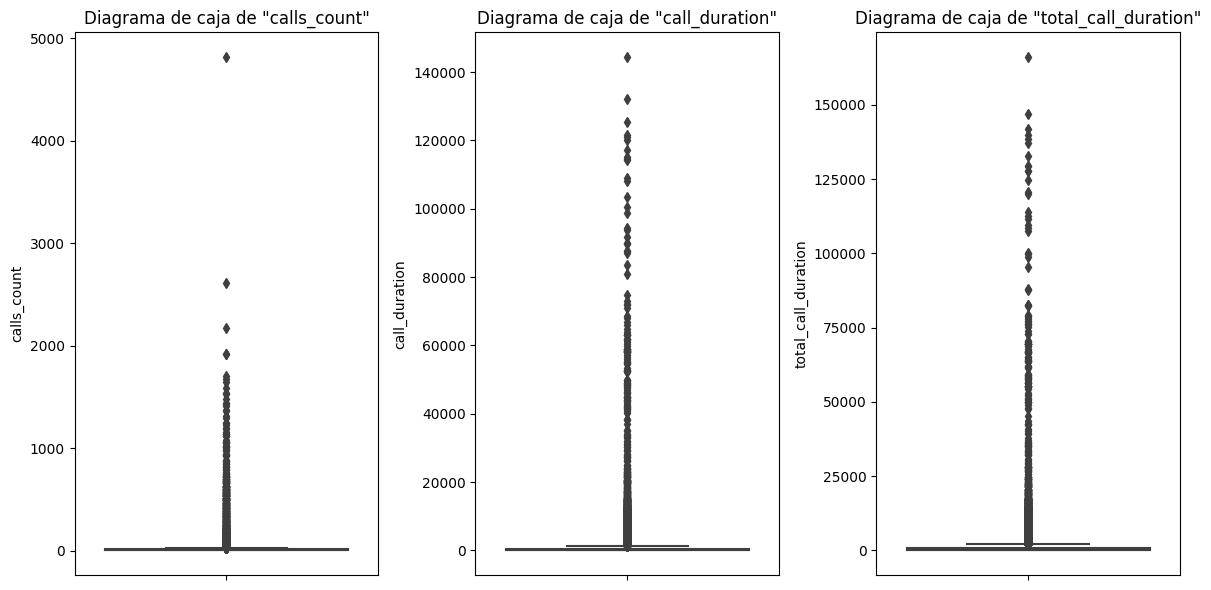

In [15]:
# Visualización en diagramas de cajas de los valores atípicos

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='calls_count', data=telecom)
plt.title('Diagrama de caja de "calls_count"')

plt.subplot(1, 3, 2)
sns.boxplot(y='call_duration', data=telecom)
plt.title('Diagrama de caja de "call_duration"')

plt.subplot(1, 3, 3)
sns.boxplot(y='total_call_duration', data=telecom)
plt.title('Diagrama de caja de "total_call_duration"')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
La visualización de los diagramas de caja es una excelente manera de identificar visualmente los valores atípicos en tus datos. Esto ayuda a comunicar claramente la distribución y los posibles problemas con los datos, como valores extremos que podrían influir en el análisis.
</div>


Para entender un poco mejor de que los valores atípicos encontrados hacen parte de la naturaleza del negocio, decidí realizar una gráfica de caja para cada una de las columnas 'calls_count', 'call_duration' y 'total_call_duration', de ellas observo lo siguiente:

Diagrama de caja de "calls_count". Muestra que la mayoría de los usuarios realizaron un número bajo de llamadas, pero otros usuarios, un pequeño grupo realizó un número demasiado alto de llamadas.

Diagrama de caja de "call_duration". Aquí se observa que la mayoría de las llamadas duraron poco tiempo, pero también de que hubo llamadas de una duración muy larga.

Diagrama de caja de "total_call_duration". Tiene un análisis muy similar al diagra de 'call_duration', pues muestra que hay una alta concentración de llamadas con tiempos de duración cortos, pero otras llamadas con tiempos de duración extremadamente largo, en ambos casos ya incluyendo el tiempo de espera.  

Cabe anotar que en los tres diagramas de caja la acumulación de la mayoría de valores hacia la parte de abajo de las cajas, indican el comportamiento de la mayoría de los ususarios en las llamadas en cuanto a cantidad y duración y hacia la parte de arriba se bvan presentando los valores atípicos con uchas llamadas o con tiempos de duración muy largos.

## **Paso 2. EDA: Análisis Exploratorio de los Datos**

### **2.1. Realizar un análisis del comportamiento de las llamadas entrantes y salientes**

In [16]:
# Contar las llamadas entrantes y salientes

direction_count = telecom['direction'].value_counts()

print('Cantidad de llamadas entrantes (in) y salientes (out):')
print(direction_count)
print()

Cantidad de llamadas entrantes (in) y salientes (out):
out    28997
in     19895
Name: direction, dtype: int64



In [17]:
# Cacular el porcentaje de llamadas entrantes y salientes

total_call = direction_count.sum()

direction_percentage = (direction_count / total_call) * 100

print('Porcentaje de llamadas entrantes (in) y salientes (out):')
print(direction_percentage)
print()

Porcentaje de llamadas entrantes (in) y salientes (out):
out    59.308271
in     40.691729
Name: direction, dtype: float64



### **2.2. Realizar la distribución y el análisis de ellas en el total de llamadas**

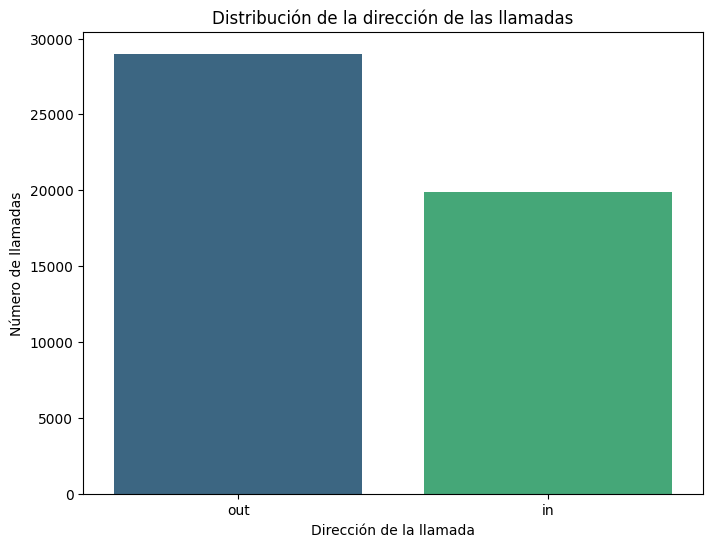

In [18]:
# Visualizar el conteo de llamadas por dirección

plt.figure(figsize=(8, 6))

sns.barplot(x=direction_count.index, y=direction_count.values, palette='viridis')
plt.title('Distribución de la dirección de las llamadas')
plt.xlabel('Dirección de la llamada')
plt.ylabel('Número de llamadas')

plt.show()

<div class="alert alert-block alert-success">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
Has hecho un buen trabajo al visualizar la distribución de las direcciones de las llamadas. Esta representación gráfica proporciona una clara comprensión de la predominancia de las llamadas salientes sobre las entrantes, lo que es útil para el análisis de patrones de llamadas.
</div>


Luego de realizar ls cálculos de las llamadas entradas y salientes, su participación en el total de llamadas y la visualización en un gráfico barras, se encontró que las llamadas salientes tienen una cantidad de 28,997 siendo practicamente el 60% de las llamadas, mientras que las llamadas entrantes tienen una cantida de 19,895 representando el 40% del total de llamadas. Esto puede sugerir que la actividad de los operadores del CallMeMaybe es proactiva pues parte de su trabajo es realizar llamadas a los cientes  internamiente entre los mismos operadores.

En la gráfica de barras se puede visualizar un poco mejor la proporción entre las lllamadas, aproximadamente un tercio de las llamadas corresponden a llamadas salientes y la otra parte corresponden a llamadas entrantes.

### **2.3. Realizar un análisis de las duración de las llamadas**

In [19]:
# Calcular las métricas de la duración de las llamadas de la columna 'call_duration'

mean_call_duration = telecom['call_duration'].mean()
print('La media de la duración de llamada (sin tiempo de espera) en minutos es:', (mean_call_duration/60).round(2))

median_call_duration = telecom['call_duration'].median()
print('La mediana de la duración de llamada (sin tiempo de espera) en minutos es:', (median_call_duration/60).round(2))

min_call_duration = telecom['call_duration'].min()
print('La duración de llamada (sin tiempo de espera) más corta en minutos es:', (min_call_duration/60).round(2))

max_call_duration = telecom['call_duration'].max()
print('La duración de llamada (sin tiempo de espera) más larga en minutos es:', (max_call_duration/60).round(2))
print()

La media de la duración de llamada (sin tiempo de espera) en minutos es: 14.47
La mediana de la duración de llamada (sin tiempo de espera) en minutos es: 0.62
La duración de llamada (sin tiempo de espera) más corta en minutos es: 0.0
La duración de llamada (sin tiempo de espera) más larga en minutos es: 2406.58



In [20]:
# Calcular las métricas de la duración de las llamadas de la columna 'total_call_duration'

mean_total_call_duration = telecom['total_call_duration'].mean()
print('La media de la duración de llamada (con tiempo de espera) en minutos es:', (mean_total_call_duration/60).round(2))

median_total_call_duration = telecom['total_call_duration'].median()
print('La mediana de la duración de llamada (con tiempo de espera) en minutos es:', (median_total_call_duration/60).round(2))

min_total_call_duration = telecom['total_call_duration'].min()
print('La duración de llamada (con tiempo de espera) más corta en minutos es:', (min_total_call_duration/60).round(2))

max_total_call_duration = telecom['total_call_duration'].max()
print('La duración de llamada (con tiempo de espera) más larga en minutos es:', (max_total_call_duration/60).round(2))
print()

La media de la duración de llamada (con tiempo de espera) en minutos es: 19.32
La mediana de la duración de llamada (con tiempo de espera) en minutos es: 3.5
La duración de llamada (con tiempo de espera) más corta en minutos es: 0.0
La duración de llamada (con tiempo de espera) más larga en minutos es: 2769.25



In [21]:
# Calcular la duración de las llamadas con respecto a la dirección en la columna 'call_duration'

mean_call_duration_in = telecom[telecom['direction'] == 'in']['call_duration'].mean()
print('Duración promedio de llamadas entrantes (in) en minutos (sin tiempo despera):', (mean_call_duration_in/60).round(2))

mean_call_duration_out = telecom[telecom['direction'] == 'out']['call_duration'].mean()
print('Duración promedio de llamadas salientes (out) en minutos (sin tiempo despera):', (mean_call_duration_out/60).round(2))

print()

Duración promedio de llamadas entrantes (in) en minutos (sin tiempo despera): 8.24
Duración promedio de llamadas salientes (out) en minutos (sin tiempo despera): 18.74



In [22]:
# Calcular la duración de las llamadas con respecto a la dirección en la columna 'total_call_duration'

mean_total_call_duration_in = telecom[telecom['direction'] == 'in']['total_call_duration'].mean()
print('Duración promedio de llamadas entrantes (in) en minutos (con tiempo despera):', (mean_total_call_duration_in/60).round(2))

mean_total_call_duration_out = telecom[telecom['direction'] == 'out']['total_call_duration'].mean()
print('Duración promedio de llamadas salientes (out) en minutos (con tiempo despera):', (mean_total_call_duration_out/60).round(2))

print()

Duración promedio de llamadas entrantes (in) en minutos (con tiempo despera): 10.33
Duración promedio de llamadas salientes (out) en minutos (con tiempo despera): 25.48



In [23]:
# Encontrar la diferencia de las medias en tiempo de espera de las llamadas 

# Tiempo de espera
waiting_time = mean_total_call_duration - mean_call_duration
print('Promedio del tiempo de espera en minutos:', (waiting_time/60).round(2))

# Tiempo de espera con respecto a la dirección
waiting_time_in = mean_total_call_duration_in - mean_call_duration_in
print('Promedio del tiempo de espera en minutos de llamadas entrantes:', (waiting_time_in/60).round(2))

waiting_time_out = mean_total_call_duration_out - mean_call_duration_out
print('Promedio del tiempo de espera en minutos de llamadas salientes:', (waiting_time_out/60).round(2))
print()

Promedio del tiempo de espera en minutos: 4.85
Promedio del tiempo de espera en minutos de llamadas entrantes: 2.09
Promedio del tiempo de espera en minutos de llamadas salientes: 6.74



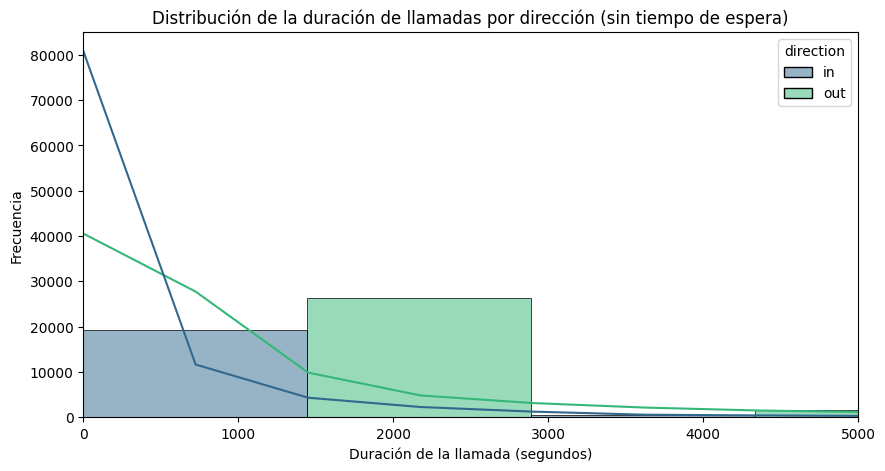

In [24]:
# Histograma para la duración de llamadas por dirección para 'call_duration'

plt.figure(figsize=(10, 5))

sns.histplot(data=telecom, x='call_duration', hue='direction', multiple='dodge', kde=True, bins=50, palette='viridis')
plt.title('Distribución de la duración de llamadas por dirección (sin tiempo de espera)')
plt.xlabel('Duración de la llamada (segundos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 5000) 

plt.show()

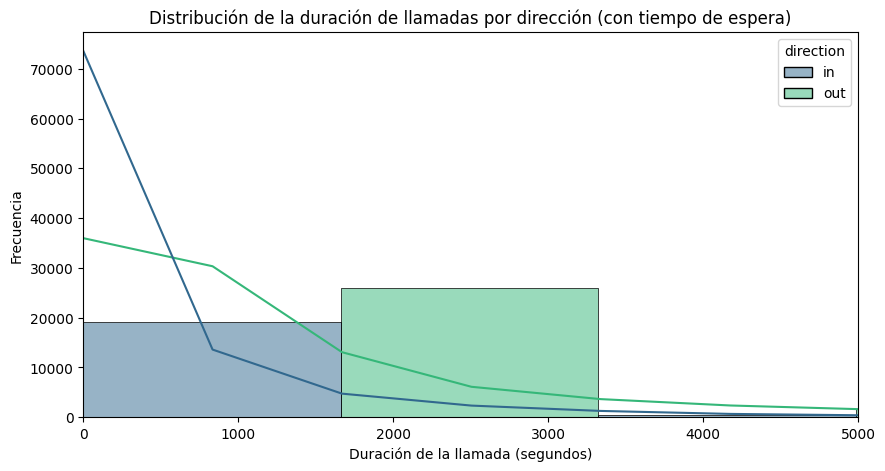

In [25]:
# Histograma para la duración de llamadas por dirección para 'total_call_duration'

plt.figure(figsize=(10, 5))

sns.histplot(data=telecom, x='total_call_duration', hue='direction', multiple='dodge', kde=True, bins=50, palette='viridis')
plt.title('Distribución de la duración de llamadas por dirección (con tiempo de espera)')
plt.xlabel('Duración de la llamada (segundos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 5000) 

plt.show()

En el punto del procesamiento de datos se realizó una análisis previo de los valores atípicos de las columnas 'call_duration' y 'total_call_duration'. Aquí se analizan los tiempos de llamadas en minutos para ser un poco más comprensible los resultads obtenidos.

- En cuanto a la columna 'call_duration' donde no se considera el tiempo de espera de cada llamada se puede decir:
    1. La media de la duración de llamada es de casi 15 minutos, la llamada más corta de 0 minutos y la más larga de 2406.58 minutos, es decir de casi 40 horas, mientras que la mediana es de 0.62 minutos. Esto confirma la presencia de valores atípicos extremos, la mayoría de las llamadas son muy cortas, pero algunas duran mucho más tiempo, es como si la llamada quedara activa por casi un día y medio.
    2. La duración promedio de llamadas entrantes es de 8.24 minutos, mientras que la llamadas salientes tiene una duración promedio de 18.74 minutos. Este resultado es coherente con el obtenido anteriormente donde se muestra que la actividad principal de los operadores es proactiva al ser las llamadas salientes (más del doble a las entrantes) son duran más, posiblemente de ventas o seguimiento a los usuarios, este tipo de llamadas suelen ser más largas que las de soporte técnico atendio en las llamadas entrantes.

- En cuanto a la columna 'total_call_duration' donde se tiene en cuenta el tiempo de espera de cada llamada se puede decir:
    1. La media de la duración de llamada es de 19.32 minutos, la llamada más corta es de 0 minutos, la llamada más larga de 2769.25 minutos es decir 46 horas, mientras la mediana es de 3 minutos y medio. El análisis de estos resultados es muy similar a realizado anterirmente en 'call_duration'.
    2. La duración promedio de llamadas entrantes con tiempo de despera es de 10.33 minutos, mientras que las llamadas salientes con tiempo de despera tiene una duración de 25.48 minutos.

- El tiempo de espera en las llamadas es de 5 minutos en promedio, para las llamadas entrantes es de 2 minutos y para las llamadas salientes es de 7 minutos aproximadamente en promedio.

De forma general, en cuanto a las llamdas entrantes de puede decir que al presentar duraciones menores y tiempos de espera en promedio de 2 minutos, los operadores se podrían considerar ágiles para atender a los clientes en ayudarles a resolver los problemas e inquietudes.

En cuanto a las llamdas salientes, la duración de estas llamadas son más del doble que las entrantes y el tiempo de espera es muy largo casi 7 minutos. Esto podría indicar que los operadores se están tomando mucho tiempo en preparar las llamadas, o se toman mucho tiempo esperando en que el cliente o sus compañeros (para llamadas internas) respondan las llamadas.

Con respecto a las gráficas se puede decir que confirman os resultados obtenidos anterirmente. La línea azul (llamadas entrantes) muestra que la mayoría de estas llamadas son muy cortas, con una caída importante en la frecuencia a medida que aumenta la duración.

Sin embargo, las llamadas salientes tienen un tiempo de espera y una duración más alta. La línea verde (llamadas salientes) también tiene una alta frecuencia de llamadas cortas, pero se mantiene relativamente más alta que la azul para duraciones más largas. Esto confirma que las llamadas salientes tienden a durar más.

Esto sugiere que, aunque el call center tiene un gran volumen de llamadas cortas y eficientes, hay un segmento de llamadas salientes que requiere un tiempo considerable y que podría ser un punto de optimización en los procesos de trabajo.

### **2.4. Realizar un análisis de las llamadas internas y externas**

In [26]:
# Contar el número de llamadas internas y externas

internal_calls = telecom['internal'].value_counts()

print('Cantidad de llamadas por tipo (internas vs. externas):')
print(internal_calls)
print()

Cantidad de llamadas por tipo (internas vs. externas):
False    43239
True      5653
Name: internal, dtype: int64



In [27]:
# Calcular el porcentaje de cada tipo de llamada

total_internal_calls = internal_calls.sum()

internal_calls_percentage = (internal_calls / total_internal_calls) * 100

print('Porcentaje de llamadas internas (True) y externas (False):')
print(internal_calls_percentage)
print()

Porcentaje de llamadas internas (True) y externas (False):
False    88.437781
True     11.562219
Name: internal, dtype: float64



En mi proceso de descomposición de los datos no incluí el análisis sobre las llamadas internas y externas. Sin embargo, para tener un mejor entendimiento del comportamiento de las llamadas, aquí se incluye este punto.

Con respecto a los valores obtenidos de las llamadas externas e internas se encontró que:
- El 88.5% , es decir la mayoría de las llamadas (43,239 del total de llamadas) se realizaron para una interacción con los clientes, ya sean llamadas entrantes o salientes. 
- El 11.5% restante del total de llamadas, se realizarn internamente (5,653), esto quiere decir que fueron llamdas realizadas entre los mismos operadores para realizar una consulta, o llamadas entre el mismo personal incluyendo la parte administrativa de CallMeMaybe con su personal operativo, es deci sus operadores y viceversa.


### **2.5. Encontrar el porcentaje de las llamadas perdidas**

In [28]:
# Calcular el porcentaje de llamadas perdidas del total de llamadas

missed_calls_percentage = telecom['is_missed_call'].mean() * 100

print('Porcentaje de llamadas perdidas del total de llamadas:', missed_calls_percentage.round(2))
print()

Porcentaje de llamadas perdidas del total de llamadas: 43.76



<div class="alert alert-block alert-warning">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
El cálculo del porcentaje de llamadas perdidas es un paso importante para entender el comportamiento de las llamadas. Dado el alto porcentaje de llamadas perdidas, podría ser útil investigar más a fondo las causas potenciales, como correlacionar esta métrica con la duración de la llamada o el operador, para identificar áreas de mejora.
</div>


In [29]:
# Calcular el porcentaje de llamadas perdidas de las llamadas entrantes

missed_calls_in = telecom[(telecom['direction'] == 'in') & (telecom['is_missed_call'] == True)].shape[0]

total_calls_in = telecom[telecom['direction'] == 'in'].shape[0]

missed_calls_porcentage_in = (missed_calls_in / total_calls_in) * 100

print(f'Porcentaje de llamadas perdidas entrantes: {round(missed_calls_porcentage_in, 2)}')
print()

Porcentaje de llamadas perdidas entrantes: 39.37



In [30]:
# Calcular el porcentaje de llamadas perdidas de las llamadas entrantes

missed_calls_out = telecom[(telecom['direction'] == 'out') & (telecom['is_missed_call'] == True)].shape[0]

total_calls_out = telecom[telecom['direction'] == 'out'].shape[0]

missed_calls_porcentage_out = (missed_calls_out / total_calls_out) * 100

print(f'Porcentaje de llamadas perdidas salientes: {round(missed_calls_porcentage_out, 2)}')
print()

Porcentaje de llamadas perdidas salientes: 46.78



Del total de la llamadas entrantes 19,895, casi el 40% de estas son llamadas perdidas. Es un valor muy alto, significa que muchos clientes están intentando comunicarse con un operador y no están siendo atendidos. Esto puede afectar directamente la satisfacción del cliente y el rendimiento del negocio.

Por otro lado, del total de llamadas salientes 28,997, el 47% de las llamadas son perdidas. El que esta tasa de llamadas perdidas sea mayor que las llamadas perdidas entrantes puede significar que: los operadores están marcando números incorrectos, están llamando en horarios en los que los clientes no están disponibles, el proceso de llamadas no es eficiente y pierden una gan cantidad de tiempo que terminan en llamadas perdidas o algo en sistema de llamadas está fallando impidiendo tener una llamada con los clientes.

Se encontró que del total de llamadas realizadas es decir 48,892, casi el 44% son llamadas perdidas. Esto indica que hay un factor para tener muy en cuenta por estar afectando la eficacia de las llamadas, perdiendo tiempo de los operadores tratando de conectar con los clientes y de los clientes al no estar siendo atendidos como esperan.

### **2.6. Realizar un análisis de las llamadas por operador**

In [31]:
# Eliminar la fila del operador 'Unknown'
telecom = telecom[telecom['operator_id'] != 'Unknown']

# Calcular el tiempo de espera
telecom['waiting_time'] = telecom['total_call_duration'] - telecom['call_duration']

# Calcular las columnas booleanas para llamadas perdidas
telecom['missed_internal'] = (telecom['is_missed_call'] == 1) & (telecom['internal'] == 1)
telecom['missed_external'] = (telecom['is_missed_call'] == 1) & (telecom['internal'] == 0)

# Agrupar la información para cada operador
operators = telecom.groupby('operator_id').agg(
    total_calls=('calls_count', 'count'),
    total_calls_in=('direction', lambda x: (x == 'in').sum()),
    total_calls_out=('direction', lambda x: (x == 'out').sum()),
    total_calls_internal=('internal', lambda x: (x == 1).sum()),
    missed_calls=('is_missed_call', lambda x: (x == 1).sum()),
    missed_internal_calls=('missed_internal', 'sum'),
    missed_external_calls=('missed_external', 'sum'),
    call_duration_mean=('call_duration', 'mean'),
    total_call_duration_mean=('total_call_duration', 'mean'),
    waiting_time_mean=('waiting_time', 'mean')
).reset_index()

operators

,operator_id,total_calls,total_calls_in,total_calls_out,total_calls_internal,missed_calls,missed_internal_calls,missed_external_calls,call_duration_mean,total_call_duration_mean,waiting_time_mean
0,879896.0,117,21,96,15,47,10,37,545.829060,650.743590,104.914530
1,879898.0,226,56,170,15,89,13,76,1138.889381,1598.579646,459.690265
2,880020.0,20,7,13,3,6,2,4,112.250000,126.250000,14.000000
3,880022.0,70,8,62,8,29,8,21,216.385714,270.357143,53.971429
4,880026.0,182,18,164,13,87,13,74,842.450549,964.428571,121.978022
...,...,...,...,...,...,...,...,...,...,...,...
1087,972410.0,4,0,4,0,2,0,2,944.250000,1318.750000,374.500000
1088,972412.0,5,1,4,0,2,0,2,699.600000,909.600000,210.000000
1089,972460.0,7,1,6,2,3,1,2,174.000000,262.571429,88.571429
1090,973120.0,2,0,2,0,1,0,1,2.500000,12.500000,10.000000


<div class="alert alert-block alert-success">
<b>Celda [31]</b> <a class="tocSkip"></a><br>
El cálculo de métricas agregadas por operador es un enfoque sólido para identificar ineficiencias. Esto te permite realizar un análisis comparativo entre operadores y tomar decisiones basadas en datos para mejorar la eficiencia operativa.
</div>


El DataFrame obtenido 'operators' contiene la información agrupada para cada operador, como el total de llamadas, llamadas entrantes, llamadas salientes, llamadas internas, llamadas perdidas internas y externas, duración de llamadas y tiempo de espera. En total se obtienen 1192 operadores, el operador 1093 'Unknown' agrupa los datos de todos los operadores o de un sólo operador que no presentó una identificación 'operator_id'.

En análisis previos a este, se encontraron que los operadores con identificación desconocida 'Unknown' eran en total 7,401 operadores, consideré importante eliminar esta fila para poder continuar el análisis con operadores conocidos para poder cumplir con el objetivo de este proyecto.

Del DataFrame obtenido 'operators' se puede ver claramente la diferencia en los operadores con respecto al total de llamadas, uno tienen más de 200 y otros solo 1, lo mismo pasa con la duración de las llamadas, unos tienen más de 1,000 minutos y otros solo 2.

Las columnas 'missed_internal_calls' y 'missed_external_calls' son muy importantes para determinar la ineficacia de los operadores con respeto a las llamadas en donde interactúa con los clientes y como interactúa con las llamadas internas.

## **Paso 3.  Objetivo del proyecto. Identificar operadores menos eficaces**

### **3.1. Establecer los parámetros de ineficacia**

De acuerdo al Análisis Exploratorio de los Datos, los parámetros que son útiles para determinar la ineficacia de los operarios son la siguientes:

1. Cantidad de llamadas perdidas internas, 'missed_internal_calls'
2. Cantidad de llamadas perdidas externas, 'missed_external_calls'
3. Tiempo de espera desde que se realiza la llamada hasta que es contestada, 'waiting_time_min'
4. Cantidad de llamadas salientes, 'total_calls_out'

### **3.2. Realizar la evaluación para detectar los operadores ineficaces**

In [32]:
# Normalizar las métricas establecidas de ineficacia para encontrar los operadores ineficaces

min_missed_internal = operators['missed_internal_calls'].min()
max_missed_internal = operators['missed_internal_calls'].max()
operators['missed_internal_norm'] = (operators['missed_internal_calls'] - min_missed_internal) / (max_missed_internal - min_missed_internal)

min_missed_external = operators['missed_external_calls'].min()
max_missed_external = operators['missed_external_calls'].max()
operators['missed_external_norm'] = (operators['missed_external_calls'] - min_missed_external) / (max_missed_external - min_missed_external)

min_waiting_time = operators['waiting_time_mean'].min()
max_waiting_time = operators['waiting_time_mean'].max()
operators['waiting_time_norm'] = (operators['waiting_time_mean'] - min_waiting_time) / (max_waiting_time - min_waiting_time)

min_total_calls_out = operators['total_calls_out'].min()
max_total_calls_out = operators['total_calls_out'].max()
operators['total_calls_out_norm'] = 1 - ((operators['total_calls_out'] - min_total_calls_out) / (max_total_calls_out - min_total_calls_out))

operators.head()

,operator_id,total_calls,total_calls_in,total_calls_out,total_calls_internal,missed_calls,missed_internal_calls,missed_external_calls,call_duration_mean,total_call_duration_mean,waiting_time_mean,missed_internal_norm,missed_external_norm,waiting_time_norm,total_calls_out_norm
0,879896.0,117,21,96,15,47,10,37,545.829060,650.743590,104.914530,0.238095,0.327434,0.018073,0.578947
1,879898.0,226,56,170,15,89,13,76,1138.889381,1598.579646,459.690265,0.309524,0.672566,0.079188,0.254386
2,880020.0,20,7,13,3,6,2,4,112.250000,126.250000,14.000000,0.047619,0.035398,0.002412,0.942982
3,880022.0,70,8,62,8,29,8,21,216.385714,270.357143,53.971429,0.190476,0.185841,0.009297,0.728070
4,880026.0,182,18,164,13,87,13,74,842.450549,964.428571,121.978022,0.309524,0.654867,0.021012,0.280702


In [33]:
# Calcular la puntuación de ineficacia con las métricas establecidas normalizadas
operators['inefficiency_score'] = (
    operators['missed_internal_norm'] +
    operators['missed_external_norm'] +
    operators['waiting_time_norm'] +
    operators['total_calls_out_norm'])

# Ordenar los operadores por el puntaje de ineficacia
operators_sorted = operators.sort_values(by='inefficiency_score', ascending=False)

print('Los 10 operadores más ineficientes son:')
print()
operators_sorted.head(10)

Los 10 operadores más ineficientes son:



,operator_id,total_calls,total_calls_in,total_calls_out,total_calls_internal,missed_calls,missed_internal_calls,missed_external_calls,call_duration_mean,total_call_duration_mean,waiting_time_mean,missed_internal_norm,missed_external_norm,waiting_time_norm,total_calls_out_norm,inefficiency_score
29,885890.0,253,94,159,0,101,0,101,13204.703557,18908.268775,5703.565217,0.000000,0.893805,0.982522,0.302632,2.178959
551,925922.0,73,27,46,0,30,0,30,11353.178082,17158.205479,5805.027397,0.000000,0.265487,1.000000,0.798246,2.063732
28,885876.0,283,90,193,2,115,2,113,15420.328622,20258.787986,4838.459364,0.047619,1.000000,0.833495,0.153509,2.034622
583,929428.0,65,0,65,0,32,0,32,4263.353846,9741.476923,5478.123077,0.000000,0.283186,0.943686,0.714912,1.941784
78,891410.0,261,70,191,43,119,42,77,1268.747126,1397.402299,128.655172,1.000000,0.681416,0.022163,0.162281,1.865859
79,891414.0,249,59,190,52,113,42,71,1086.228916,1178.228916,92.000000,1.000000,0.628319,0.015848,0.166667,1.810834
317,908640.0,43,0,43,5,21,2,19,6018.697674,9556.558140,3537.860465,0.047619,0.168142,0.609448,0.811404,1.636612
582,929426.0,62,0,62,0,31,0,31,4308.080645,7646.870968,3338.790323,0.000000,0.274336,0.575155,0.728070,1.577561
108,893804.0,289,107,182,28,110,23,87,977.280277,1240.761246,263.480969,0.547619,0.769912,0.045388,0.201754,1.564673
279,906406.0,202,45,157,75,78,35,43,668.688119,823.326733,154.638614,0.833333,0.380531,0.026639,0.311404,1.551907


El DataFrame obtenido con la calificación de ineficiencia 'operators_sorted' está ordenado de forma descendente, desde el más ineficaz, hasta el más eficaz.

El operador '885890' con la calificación más alta de ineficacia 2.17, tiene 'total_calls' 253 llamadas totales, 'total_calls_in' 159 llamadas salientes, 'missed_internal_calls' 101 llamadas perdidas externas y un tiempo promedio de espera 'total_call_duration_mean' de 5,703.56 minutos. Estos valores indican que tiene el peor rendimiento con muchas llamadas perdidas y un tiempo de espera demasiado largo. 

Se puede ver que las puntuaciones van variando. El operador '891410' también tiene una puntuación también alta 1.86, pero su ineficacia parece estar más relacionada con un alto número de llamadas perdidas 119, específicamente llamadas externas 'missed_external_calls' 71.

Este índice de ineficacia 'inefficiency_score' es muy importante porque permite comparar a todos los operadores bajo los mismos criterios, sin importar la métrica específica que esté fallando.

## **Paso 4. Pruebas estadísticas**

### **4.1. Formulación de la Hipótesis nula y la Hipótesis alternativa**

**Hipótesis nula, Ho.**
La varianza del coeficiente de ineficacia de los 10 operadores más ineficaces y de los 10 operadores más eficaces es la misma. Es decir, no hay una diferencia estadísticamente significativa del coeficiente de ineficacia de la varianza entre ambos grupos.

**Hipótesis alternativa, H1.**
La varianza del coeficiente de ineficacia de alguno de los grupos es diferente. Es decir, si existe una diferencia estadísticamente significativa del coeficiente de ineficacia de la varianza entre ambos grupos.

### **4.2. Definir la prueba de Hipótesis**

En este análisis estadístico se va a utilizar la prueba Levene para determinar si las varianzas de dos grupos estadísticos que se indicaron en la formulación de las hipótesis para los datos de Telecomunicaciones son significativamente diferentes o no. 

Aprovechando que se tienen los valores del índice de ineficacia 'inefficiency_score', se pueden comparar los 10 operadores más ineficaces con los 10 operadores más eficaces.

### **4.3. Realizar la pueba estadística**

In [34]:
# Realizar la prueba Levene con los datos de la columna 'inefficiency_score' del DataFrame 'operators_sorted'

top_10_operators = operators_sorted.head(10)

rest_of_operators = operators_sorted.tail(10)

alpha = 0.05

statistic, p_value = levene(top_10_operators['inefficiency_score'], rest_of_operators['inefficiency_score'])

print(f'Estadístico de Levene: {statistic:.6f}')

print(f"Valor p: {p_value:.6f}")


if p_value < alpha:
    print('El valor p es menor que 0.05')
    print('Se rechaza la hipótesis nula. La varianza de los puntajes de ineficacia NO es igual entre los dos grupos')
else:
    print('El valor p es mayor que 0.05')
    print('No se puede rechazar la hipótesis nula. La varianza de los puntajes de ineficacia es similar entre los dos grupos')


Estadístico de Levene: 22.194011
Valor p: 0.000174
El valor p es menor que 0.05
Se rechaza la hipótesis nula. La varianza de los puntajes de ineficacia NO es igual entre los dos grupos


<div class="alert alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Constanza! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Realizaste una importación completa y correcta de las librerías necesarias.<br>
• Utilizaste el método <code>info()</code> para obtener información detallada sobre tus DataFrames.<br>
• Convertiste correctamente las columnas de fecha a un formato de datetime con zona horaria.<br>
• Uniste los DataFrames de manera efectiva, asegurando la integridad de los datos.<br>
• Manejaste adecuadamente los valores nulos y duplicados, manteniendo la calidad de los datos.<br>
• Identificaste y visualizaste valores atípicos con diagramas de caja.<br>
• Calculaste y visualizaste correctamente las distribuciones de las direcciones de las llamadas.<br>
• Calculaste métricas agregadas por operador, lo que es crucial para el análisis comparativo.<br>
• Realizaste un análisis estadístico con la prueba de Levene para evaluar la varianza.<br>
• Proporcionaste una interpretación clara y detallada de los resultados obtenidos.<br>
¡Felicidades!
</div>


Aunque en la formulación de la hipótesis y en la definición de la prueba se establecieron que los dos grupos serían los 10 operadores más ineficinetes y los 10 operadores más eficientes, es decir los de coeficiente ineficiencia con valores más altos y más bajos, también se realizaron pruebas con diferentes tamaños de muestras. De estas pruebas se confirmó que el tamaño de las muestras si puede influir en las pruebas estadísticas.

Los resultados de la prueba cuando se comparan los grupos conformados por los 10 operarios más ineficientes y los 10 más eficientes, se obtuvo un valor del estadístico de Levene de 22.19 y un p-value de 0.00017. Esto indica que la varianza de los calificaciones en el grupo de los más ineficaces es probablemente muy alta, debido a que sus puntajes están en el extremo superior de la escala. Pr otro lado, las calificaciones del grupo de los más eficaces probablemente se agrupan en un rango pequeño. Esta prueba detecta la diferencia en la dispersión de los datos entre ambos grupos.

Cuando se aumentó el tamaño de la muestra de ambos grupos, el p-value disminuyó mucho más. Esto puede deberse a que si existe la diferencia de varianza, una muestra más grande para cada grapo la hará aún más evidente para la prueba, lo que lleva a un p-value más bajo.

Cuando se aumentó sólo el tamaño de la muestra de los más ineficaces, empiezan a entrar a este grupo operadores que son menos ineficaces haciendo la distribución más grande y dispersa. Por lo tanto, al realizar la prueba Levene se encuentra que la varianza dentro de la muestra de los más ineficaces se va haciendo más grande, entonces la diferencia con el grupo de los más eficaces, donde la variana es pequeña ya no parece tan significativa. Por esta razón el valor p-value aumenta y no se rechaza la hipótesis nula. 

Como conclusión, la prueba de Levene no solo compara las varianzas entre grupos, sino que también considera la varianza interna de cada grupo. Al cambiar al cambiar el tamaño de la muestra de los grupos se afecta la varianza interna, alterando de este modo el resultado de la prueba 

Sin embargo, considero que al realizar esta prueba con el tamaño de las muestras de los 10 operadores más ineficaces y los 10 operadores más eficaces, me acerc más al objetivo de este proyecto.

## **Paso 5. Creación del Dashboard en Tableau Public**

De acuerdo a los pasos planetads en mi Plan de Descoposición. Los pasos a a seguir para la creación del Dashboard son los siguientes:
1. Trazar un histograma para la duración de la llamada
2. Trazar un gráfico circular que muestre la participación de las llamadas internas y externas
3. Agregar un filtro por tipo de llamada (interna o externa)
4. Realizar la publicación del Dashboard en Tableu Public
5. Obtener el link de la publicación del Dashboard

**Imágenes del Dashboard Proyecto Final Sprint 14. Telecomunicaciones**

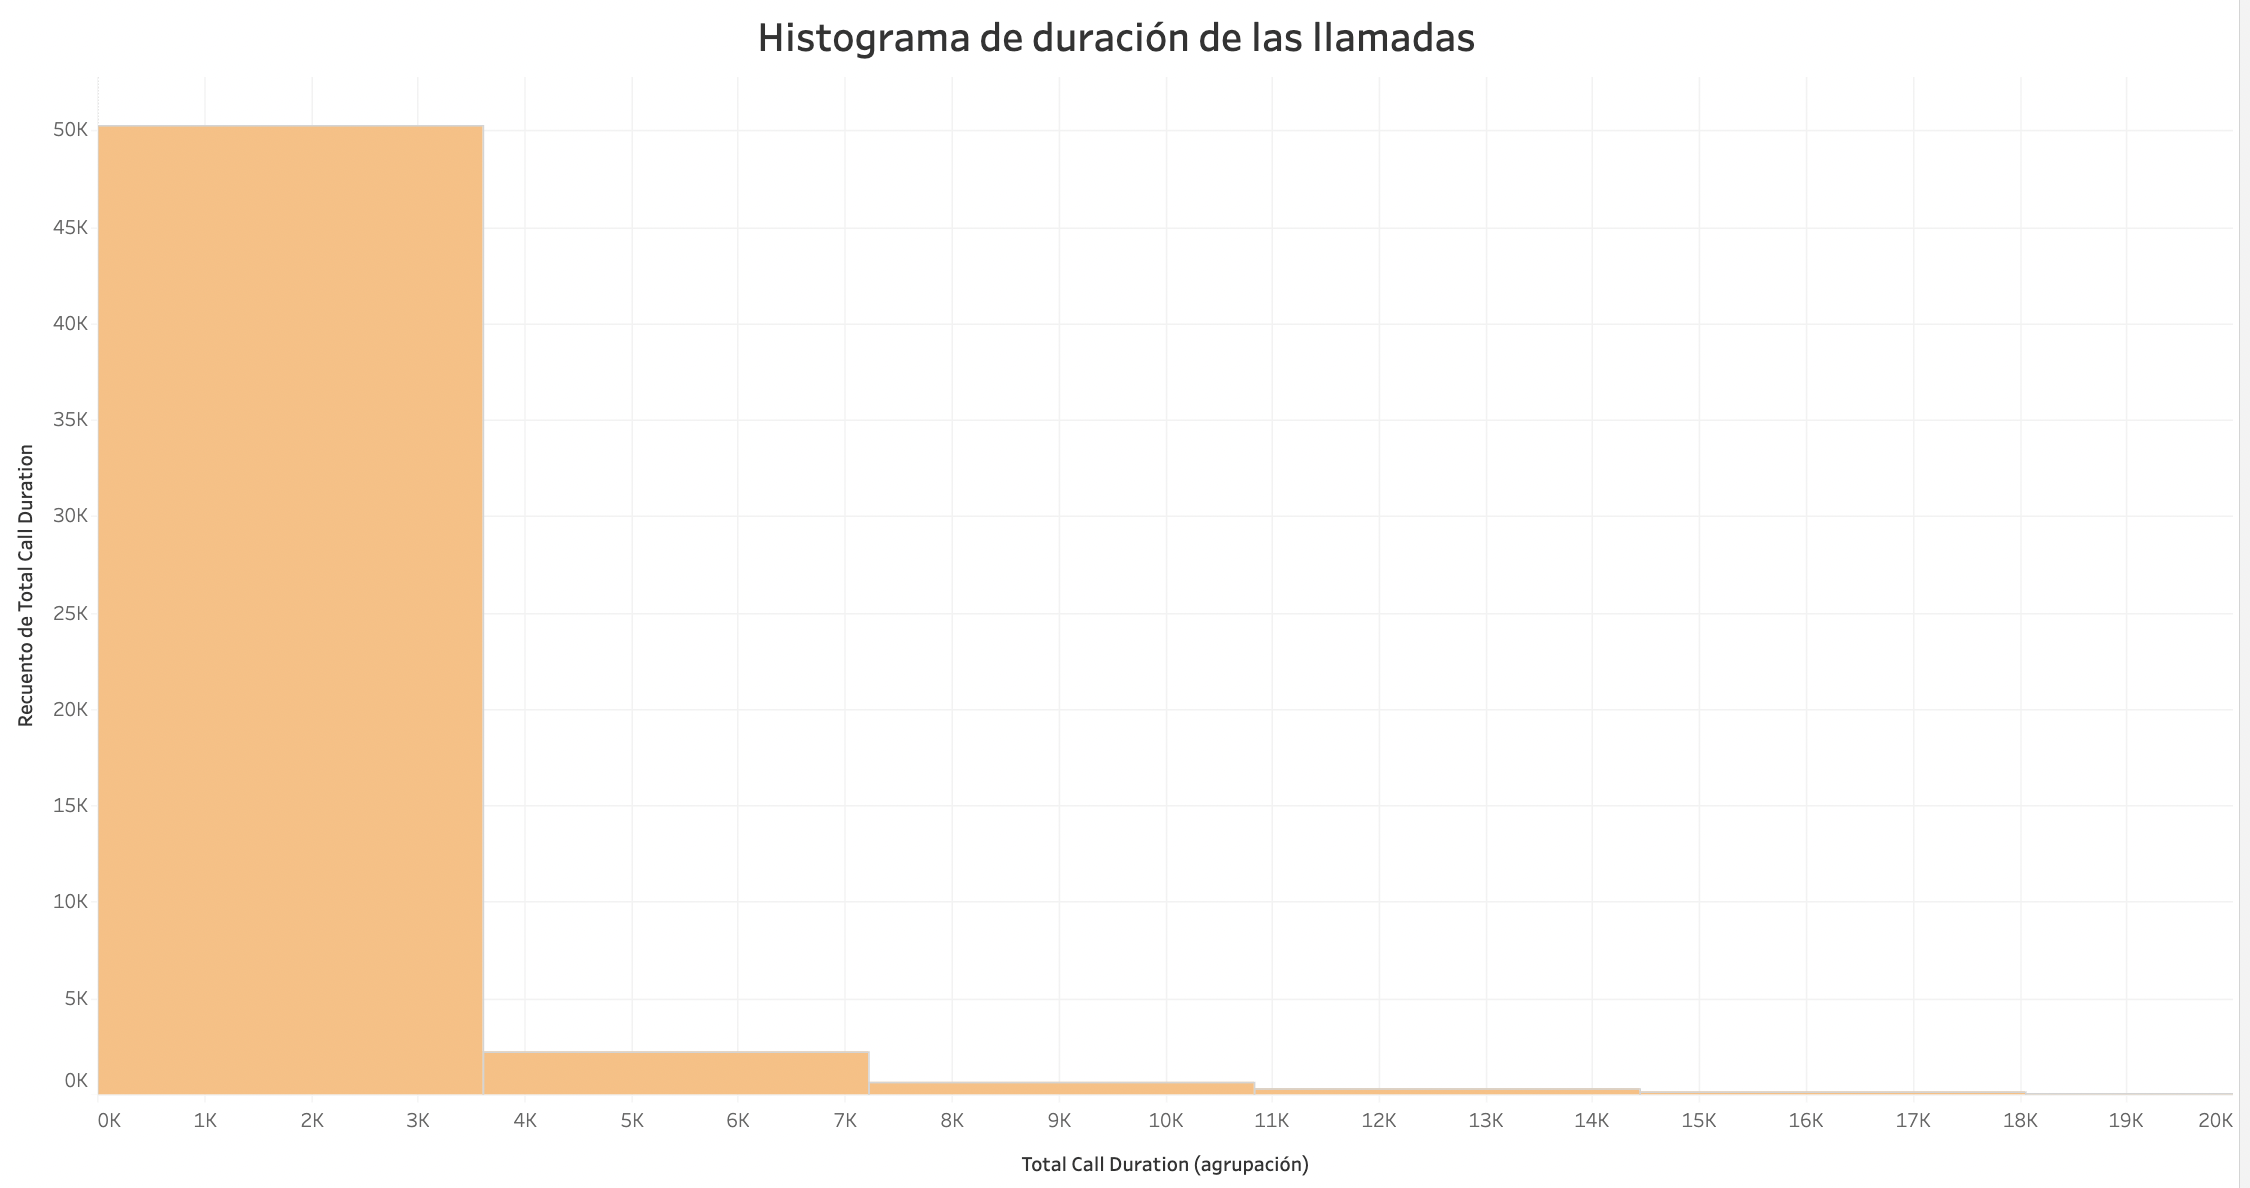

En esta gráfica 'Historial de duración total de llamadas', se obserba lo siguiente:

1. En el eje X se representa la duración total de las llamadas en segundos. Cada una de las barras en el gráfico cubre un rango de tiempo. La primera barra representa las llamadas entre 0 y 3,700 segundos aproximadamente. La segunda barra representa las llamadas entre 3,700 y 7,200 segundos. Así mismo con las demás. Se puede notar que la última barra desde 14,400 hasta los 18,000 segundos con ua frecuencia tan baja que está casi pegada al eje X. Esto indica que si hay llamadas con tiempo de duración muy largo y que puede ser un problema en el sistema o que el operador no pudo ser realmente efectivo en su comunicación al brindar una solución que satisfaciera en menos tiempo las necesidades del cliente. Esta una razón muy poderosa para mí, para no eliminar datos atípicos para este análisis porque puede brinda imformación importante, identificar problemas y brindar soluciones para mejorar la eficacia de los operarios.

2. En el eje Y se representa frecuencia con que ocurre el tiempo dellamadas o el recuento de las llamadas. Muestra la cantidad de llamadas que cayeron en el rango de tiempo de cada barra en el eje X. Por ejemplo, la barra más alta del gráfico alcanza un valor cercano a los 50,000 en el eje Y. Este valor es cercano al total de llamadas en el registro indicando que efectivamente, la mayoría de las llamadas son de duración corta. Después de la primera barra, las demás se hacen notablemente más pequeñas y se extienden a lo largo del eje X. Esto muestra que hay un número muy pequeño de llamadas que duran mucho más tiempo que la mayoría, lo que puede ser útil para identificar llamadas de clientes importantes o problemas complejos.

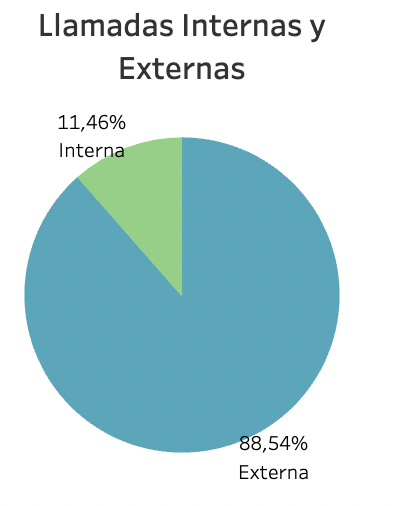

En esta gráfica de Pie obtenida en la creación del dashboard con respecto a las llamadas internas y externas, se obtuvieron los mismos resultados que con el análisis realizado en este documento. Es un buen resultado que las llamdas extrenas tienen una proporción del total de las llamadas de 88,54% indicando una interacción con el cliente en atender sus requerimientos, servicio técnico o en servicio de ventas. Por otra parte, las llamadas internas representan el 11,46%, indicando la interaccioón entre el mismo personal, consultas entre colegas o comunicación entre la parte administrativa.

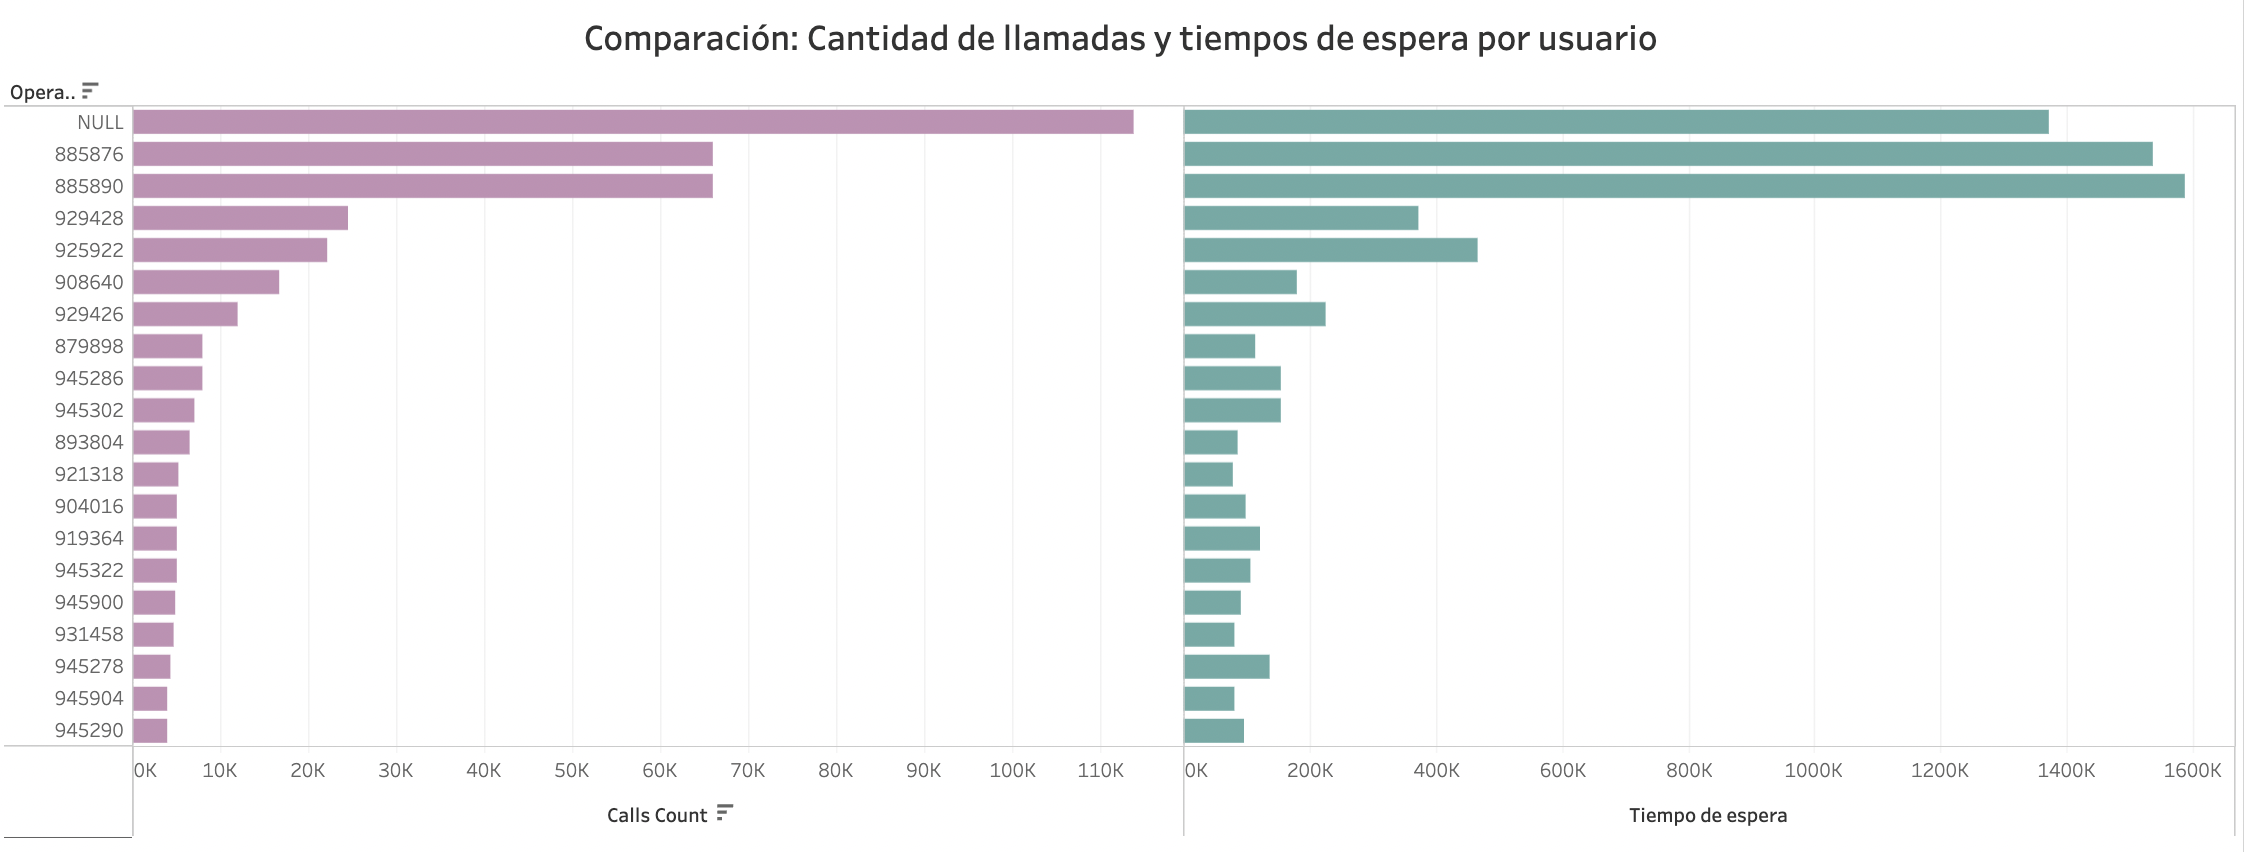

Esta gráfica fue un adicional, la consideré importante para complementar el dashboard por contener dos de las métricas aplicadas en el análsis de este proyecto que tiene como objeto identificar a los operadores más ineficaces. En ella se puede observar entre los primeros 20 operadores con más cantidad de llamadas y con tiempos de espera más largos, de que la cantidad de llamadas es proporcional al tiempo de espera, es decir entre más llamadas recibe un operador, mayor ser el tiempo de espera acumulado para dicho perador.

También quise traer esta gráfica al análisis porque aquí se evidencia uno de los problemas que se tiene con los datos y son los valores nulos en la identificación de los operadores. Para poder saber que operadores son y revisar sus calificaciones, es muy importante tenerlos plenamente identificados para así saber a que operadores se les debe realizar acciones de mejora como capacitarlos mejor para que mejoren en sus calificaciones de ineficacia y presten un mejor servicio de telefonía virtual.

**Link del Dashboard**

https://public.tableau.com/views/DashboardProyectofinalTelecomunicaciones/Dashboard2?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

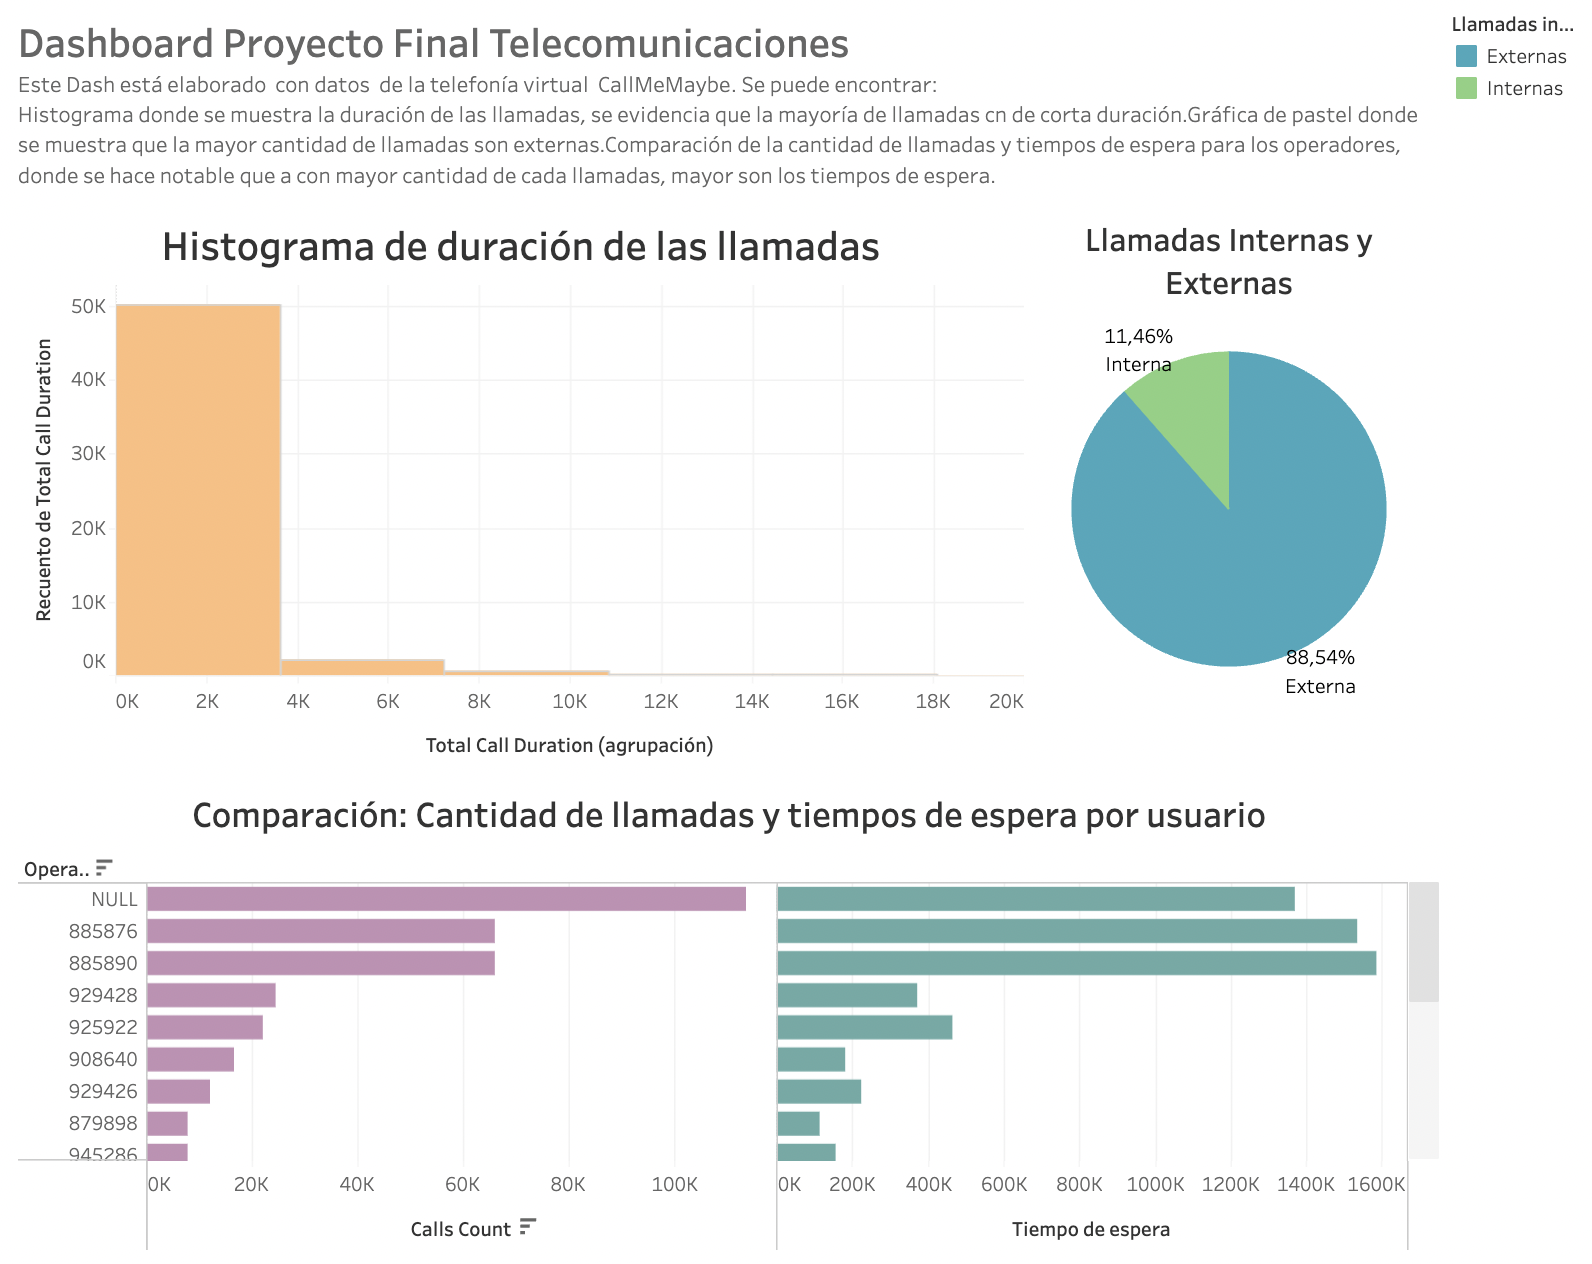

## **Paso 6. Presentación del proyecto**

Presentar la presentación del pryecto en PDF con hayazgos y conclusiones.

**Link de la presentación**

https://drive.google.com/file/d/1R3Sj0wYJ13i11E4OVvLMEMN44oICBvMT/view?usp=sharing

**Mostrar las fuentes soportes para la presentación del proyecto.**
1. Guimarães, Matheus. Potencia tu Call Center con Estos 12 Formatos Gratuitos de Monitoreos de Calidad!. Monitoreo de Calidad Call Center. April 25, 2024. 
2. Correa Mejía, Lina María. Informe de Gestión 2023. People Contac, Technology y Contac Center. Febrero, 2024.
3. ISO 18295: Requisitos para Call Centers Exitosos y de Calidad. Laura Álvarez. Oct. 2024.
4. Genesys Blog. La lista definitiva de 29 métricas y KPIs para call centers. Enero, 2025.
5. Heinl, Aechie. 5 Key Call Center Behaviors of Successful Agents. Phone Sales Tips and Techniques. Call Logic. Feb 23, 2022.
